In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
news = pd.read_csv("sentiment_analysis/sentiment_final.csv") #document with user interactions
news = news.loc[:, ~news.columns.str.contains('^Unnamed')]
news.head()

,ID,Category,SubCategory,Content,Content_emb,Sentiment
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","[0.005885085556656122, -0.007782096974551678, ...",Positive
1,N19639,health,weightloss,50 Worst Habits For Belly Fat These seemingly ...,"[-0.004876355174928904, -0.007969613187015057,...",Negative
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,"[-0.02760046347975731, -0.013719998300075531, ...",Negative
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"[-0.0297758337110281, -0.014837449416518211, 0...",Neutral
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","[0.005073545966297388, 0.004160495940595865, 0...",Positive


In [8]:
behaviors = pd.read_csv("MIND/behaviors_extra.tsv",sep='\t',  header=None)
behaviors.columns =['User', 'Time', 'ID', 'Impressions'] 
behaviors = behaviors.drop(['Time'], axis=1)
behaviors.head()

,User,ID,Impressions
0,U111,N61837 N39237 N9786 N43620 N61409,N7482-1 N6379-0
1,U222,N13861 N41051 N40272 N24967 N14962,N55689-1 N35729-0
2,U333,N9786 N47214 N24905 N56618 N34406,N20678-0 N39317-0 N58114-0 N20495-0
3,U444,N20336 N30961 N61765 N40969 N11472,N50014-0
4,U555,N59295 N9721 N3574 N43620 N22028,N35729-0 N33632-0 N49685-1 N27581-0


In [68]:
#CATEGORIES: final version

def generate_combined_category_graphs(n, user_id, behaviors_df, news_df):
    # Get the list of articles read by the user
    user_articles = behaviors_df[behaviors_df['User'] == user_id]['ID'].str.split().explode().tolist()
    # Filter news_df based on user's articles
    user_news_df = news_df[news_df['ID'].isin(user_articles)]

    # Get unique categories with values in user data
    categories_user = user_news_df['Category'].unique()

    # Plot Category distribution for user
    category_counts_user = user_news_df['Category'].value_counts()
    values_user = category_counts_user.reindex(categories_user, fill_value=0).values.tolist()

    # Load recommendation data
    recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_V2_cont.csv")
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)
    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()
    # Filter news_df based on recommended IDs
    recommended_news_df = news_df[news_df['ID'].isin(recommended_ids)]

    # Get unique categories with values in recommendations data
    categories_recommend = recommended_news_df['Category'].unique()

    # Plot Category distribution for recommendations
    category_counts_recommend = recommended_news_df['Category'].value_counts()
    values_recommend = category_counts_recommend.reindex(categories_recommend, fill_value=0).values.tolist()

    # Combine unique categories from both user and recommendations
    all_categories = np.unique(np.concatenate((categories_user, categories_recommend), axis=None))

    # Calculate total counts for each category
    total_counts = [category_counts_user.get(cat, 0) + category_counts_recommend.get(cat, 0) for cat in all_categories]

    # Sort categories based on total counts in descending order
    sorted_categories = [cat for _, cat in sorted(zip(total_counts, all_categories), reverse=True)]

    # Plot grouped bar chart with improved aesthetics
    bar_width = 0.35
    index_user = np.arange(len(all_categories))
    index_recommend = np.arange(len(all_categories)) + bar_width

    plt.figure(figsize=(12, 6))
    
    # Plot bars for recommendations
    plt.bar(index_recommend, [category_counts_recommend.get(cat, 0) for cat in sorted_categories], bar_width, color='#ff7f00', label='Recommendations', alpha=0.7, edgecolor='black')
    
    # Plot bars for user
    plt.bar(index_user, [category_counts_user.get(cat, 0) for cat in sorted_categories], bar_width, color='#1f78b4', label='User profile', alpha=0.7, edgecolor='black')

    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index_user + bar_width / 2, sorted_categories, rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

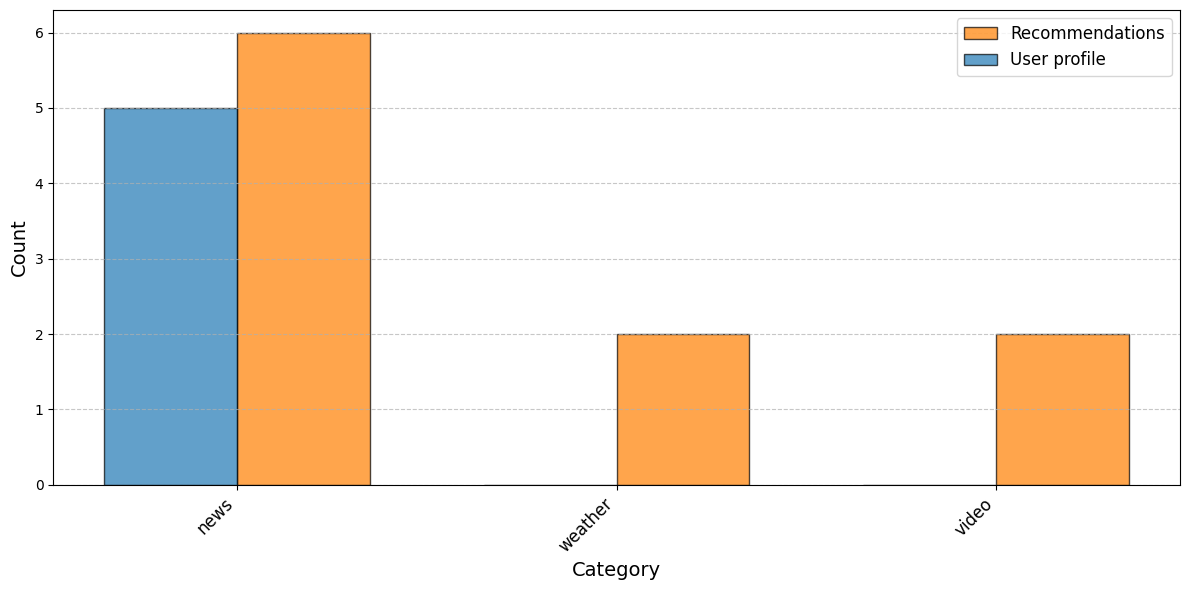

In [70]:
generate_combined_category_graphs(10, 'U111', behaviors, news)

In [71]:
#SUBCATEGORIES: final version

def generate_combined_subcategory_graphs(n, user_id, behaviors_df, news_df):
    # Get the list of articles read by the user
    user_articles = behaviors_df[behaviors_df['User'] == user_id]['ID'].str.split().explode().tolist()
    # Filter news_df based on user's articles
    user_news_df = news_df[news_df['ID'].isin(user_articles)]

    # Get unique subcategories with values in user data
    subcategories_user = user_news_df['SubCategory'].unique()

    # Plot SubCategory distribution for user
    subcategory_counts_user = user_news_df['SubCategory'].value_counts()
    values_user = subcategory_counts_user.reindex(subcategories_user, fill_value=0).values.tolist()

    # Load recommendation data
    recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_cont.csv")
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)
    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()
    # Filter news_df based on recommended IDs
    recommended_news_df = news_df[news_df['ID'].isin(recommended_ids)]

    # Get unique subcategories with values in recommendations data
    subcategories_recommend = recommended_news_df['SubCategory'].unique()

    # Plot SubCategory distribution for recommendations
    subcategory_counts_recommend = recommended_news_df['SubCategory'].value_counts()
    values_recommend = subcategory_counts_recommend.reindex(subcategories_recommend, fill_value=0).values.tolist()

    # Combine unique subcategories from both user and recommendations
    all_subcategories = np.unique(np.concatenate((subcategories_user, subcategories_recommend), axis=None))

    # Calculate total counts for each subcategory
    total_counts = [subcategory_counts_user.get(subcat, 0) + subcategory_counts_recommend.get(subcat, 0) for subcat in all_subcategories]

    # Sort subcategories based on total counts in descending order
    sorted_subcategories = [subcat for _, subcat in sorted(zip(total_counts, all_subcategories), reverse=True)]

    # Plot grouped bar chart with improved aesthetics
    bar_width = 0.35
    index_user = np.arange(len(all_subcategories))
    index_recommend = np.arange(len(all_subcategories)) + bar_width

    plt.figure(figsize=(12, 6))
    
    # Plot bars for recommendations
    plt.bar(index_recommend, [subcategory_counts_recommend.get(subcat, 0) for subcat in sorted_subcategories], bar_width, color='lightblue', label='Recommendations', alpha=0.7, edgecolor='black')
    
    # Plot bars for user
    plt.bar(index_user, [subcategory_counts_user.get(subcat, 0) for subcat in sorted_subcategories], bar_width, color='lightcoral', label='User profile', alpha=0.7, edgecolor='black')

    #plt.title('SubCategory Distribution for User and Top {} Recommendations'.format(n), fontsize=16)
    plt.xlabel('SubCategory', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index_user + bar_width / 2, sorted_subcategories, rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



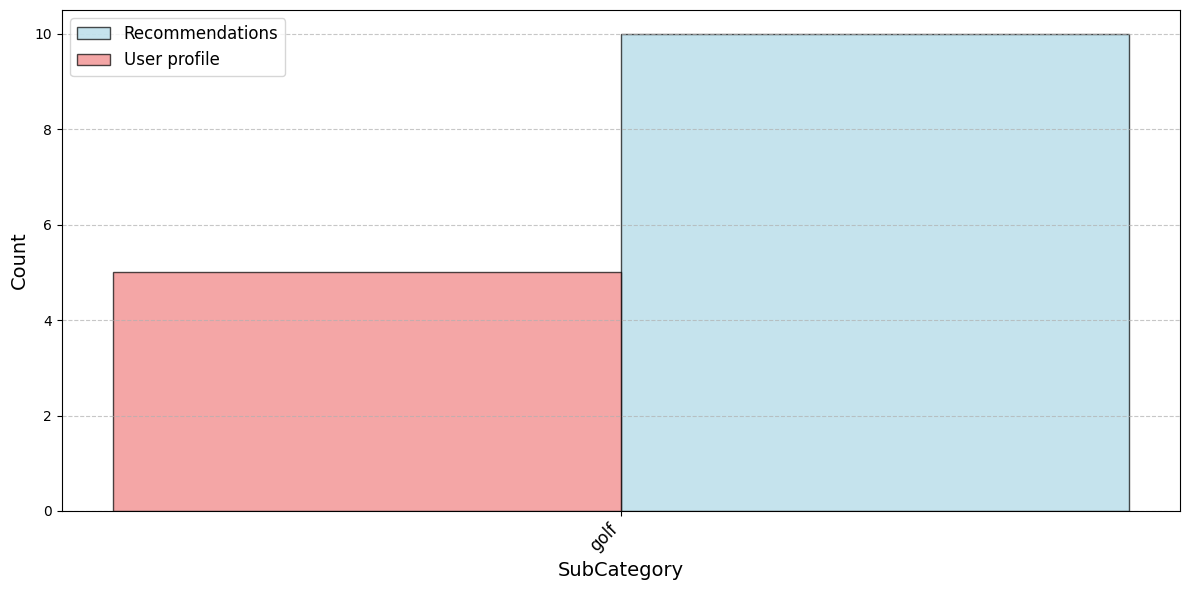

In [73]:
generate_combined_subcategory_graphs(10, 'U444', behaviors, news)

In [89]:
def generate_combined_sentiment_graphs(n, user_id, behaviors_df, news_df):
    # Get the list of articles read by the user
    user_articles = behaviors_df[behaviors_df['User'] == user_id]['ID'].str.split().explode().tolist()
    # Filter news_df based on user's articles
    user_news_df = news_df[news_df['ID'].isin(user_articles)]

    # Plot Sentiment distribution for user
    sentiment_counts_user = user_news_df['Sentiment'].value_counts()
    sentiments_user = sentiment_counts_user.index.tolist()
    values_user = sentiment_counts_user.values.tolist()

    # Load recommendation data
    recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_cont.csv")
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)
    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()
    # Filter news_df based on recommended IDs
    recommended_news_df = news_df[news_df['ID'].isin(recommended_ids)]

    # Plot Sentiment distribution for recommendations
    sentiment_counts_recommend = recommended_news_df['Sentiment'].value_counts()
    sentiments_recommend = sentiment_counts_recommend.index.tolist()
    values_recommend = sentiment_counts_recommend.values.tolist()

    # Combine unique sentiments from both user and recommendations
    all_sentiments = np.unique(np.concatenate((sentiments_user, sentiments_recommend), axis=None))

    # Calculate total counts for each sentiment
    total_counts = [sentiment_counts_user.get(sent, 0) + sentiment_counts_recommend.get(sent, 0) for sent in all_sentiments]

    # Sort sentiments based on total counts in descending order
    sorted_sentiments = [sent for _, sent in sorted(zip(total_counts, all_sentiments), reverse=True)]

    # Plot grouped bar chart for Sentiment with improved aesthetics
    bar_width = 0.35
    index_user = np.arange(len(all_sentiments))
    index_recommend = np.arange(len(all_sentiments)) + bar_width

    plt.figure(figsize=(10, 6))
    
    # Plot bars for recommendations
    plt.bar(index_recommend, [sentiment_counts_recommend.get(sent, 0) for sent in sorted_sentiments], bar_width, color='#fffdc4', label='Recommendations', alpha=0.7, edgecolor='black')
    
    # Plot bars for user
    plt.bar(index_user, [sentiment_counts_user.get(sent, 0) for sent in sorted_sentiments], bar_width, color='lightgreen', label='User profile', alpha=0.7, edgecolor='black')

    #plt.title('Sentiment Distribution for User and Top {} Recommendations'.format(n), fontsize=16)
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index_user + bar_width / 2, sorted_sentiments, rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

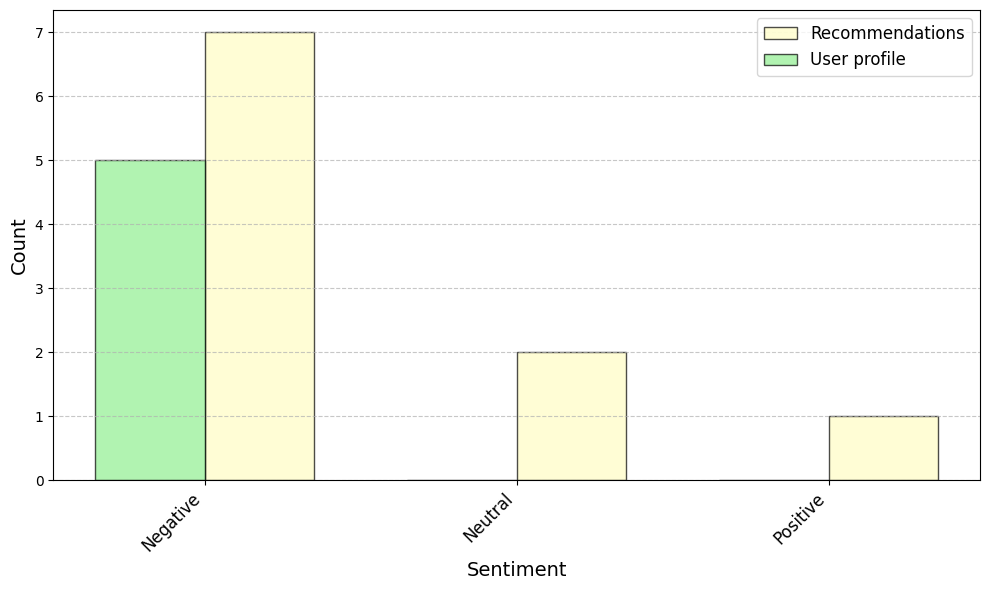

In [91]:
generate_combined_sentiment_graphs(10, 'U555', behaviors, news)